# Advanced Statistics for Physics - Exam

## Logistic Regression

In [1]:
# load libraries
library(caret)
library(LiblineaR)
library(RColorBrewer)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [2]:
# load dataset
background.path <- "data/background.csv"
signal.path     <- "data/MC_signal.csv"
data_lhcb.path  <- "data/data_lhcb.csv"


background <- read.csv(background.path, row.names=1) # label 0
signal     <- read.csv(signal.path, row.names=1)     # label 1

data_lhcb  <- read.csv(data_lhcb.path, row.names=1)  # real data

In [3]:
features <- c("Lambda_c_MM_F",      # mass Lambda_c 
              "lc_p_ProbNNp_F",     # prob Lambda_c p identified as a p 
              "lcZDecLSigma_F",     # Lambda_c z decay length over error 
              "lcstarZDecLSigma_F", # Lambda_c* z decay length over error
              "lcDecTime_F",        # Lambda_c decay time
              "lcstarDecTime_F",    # Lambda_c* decay time
              "lbDecTime_F",        # Lambda_b decay time
              "lcDecVerChi2_F",     # prob of Lambda_c Chi2 vertex
              "lcstarDecVerChi2_F", # prob of Lambda_c* Chi2 vertex
              "Lambda_b0_DIRA_OWNPV_F", # Lambda_0 DIRA of PV
              "pair0_3pi_F",        # pair mass pi_0 and pi_1 
              "pair1_3pi_F"         # pair mass pi_1 and pi_2
             )

signal     <- signal[features]
background <- background[features]

data_lhcb  <- data_lhcb[features]

In [4]:
#separation of the dataset into train and test set
#80% of the dataset is used for training

#signal
train.signal       <- signal[1:(as.integer(nrow(signal)*0.8)),]
train.label.signal <- replicate(nrow(train.signal),1)

test.signal        <- signal[(as.integer(nrow(signal)*0.8)+1):nrow(signal),]
test.label.signal  <- replicate(nrow(test.signal),1)

#background
train.background       <- background[1:(as.integer(nrow(background)*0.8)),]
train.label.background <- replicate(nrow(train.background),0)

test.background        <- background[(as.integer(nrow(background)*0.8)+1):nrow(background),]
test.label.background  <- replicate(nrow(test.background),0)

#final training and test set
train       <- rbind(train.signal,train.background)
train.label <- c(train.label.signal,train.label.background)
# shuffle data order
set.seed(20190630)
shuffle     <- sample(length(train.label))
train       <- train[shuffle,]
train.label <- train.label[shuffle]

test        <- rbind(test.signal,test.background)
test.label  <- c(test.label.signal,test.label.background)

MC          <- rbind(train, test)
MC.label    <- c(train.label, test.label)

#train <- as.matrix(train)
#test  <- as.matrix(test)
#MC    <- as.matrix(MC)

#str(train); str(train.label)
#str(test) ; str(test.label)

cost,loss,epsilon
<dbl>,<fct>,<dbl>
0.5,L1,0.01


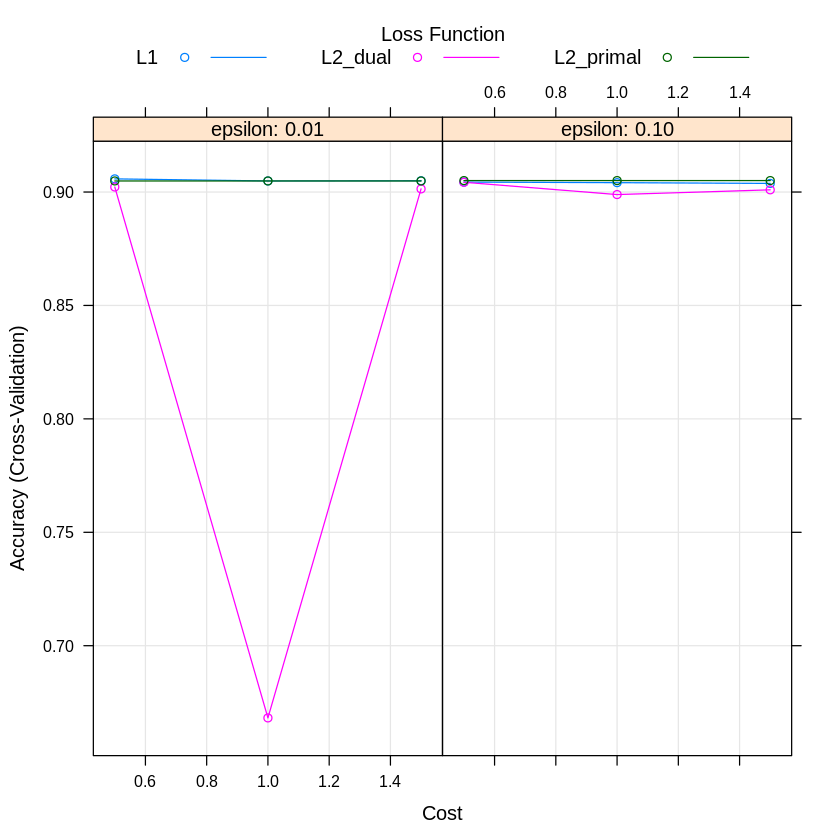

In [5]:
# coarse parameters tuning

set.seed(20190704)

tune_control <- caret::trainControl(
  method = "cv", # cross-validation
  number = 3, # with n folds
  verboseIter = FALSE,
  allowParallel = TRUE
)

tune_grid <- expand.grid(
    cost = c(0.5,1,1.5), 
    loss = c("L1", "L2_dual", "L2_primal"),
    epsilon = c(0.01, 0.1)
)

logistic.1 <- caret::train(
  x = train,
  y = as.factor(train.label),
  trControl = tune_control,
  tuneGrid = tune_grid,
  method = "regLogistic",
  verbose = FALSE
)

logistic.1$bestTune
plot(logistic.1)

,cost,loss,epsilon
,<dbl>,<fct>,<dbl>
21,0.6,L1,0.01


cost,loss,epsilon,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2,L1,0.01,0.9057141,0.2393052,0.002501039,0.02872766
0.2,L1,0.02,0.9054642,0.2270950,0.002902060,0.04580127
0.2,L1,0.03,0.9051310,0.2208745,0.001647585,0.01844486
0.2,L1,0.04,0.9052145,0.2214989,0.003800900,0.04636424
0.2,L1,0.05,0.9048812,0.2050474,0.002723366,0.03564392
0.3,L1,0.01,0.9061305,0.2446054,0.002139153,0.02700626
0.3,L1,0.02,0.9057972,0.2287353,0.002125174,0.02742904
0.3,L1,0.03,0.9052975,0.2084349,0.001987029,0.01672964
0.3,L1,0.04,0.9043813,0.2036708,0.001492227,0.02341208


png 
  2

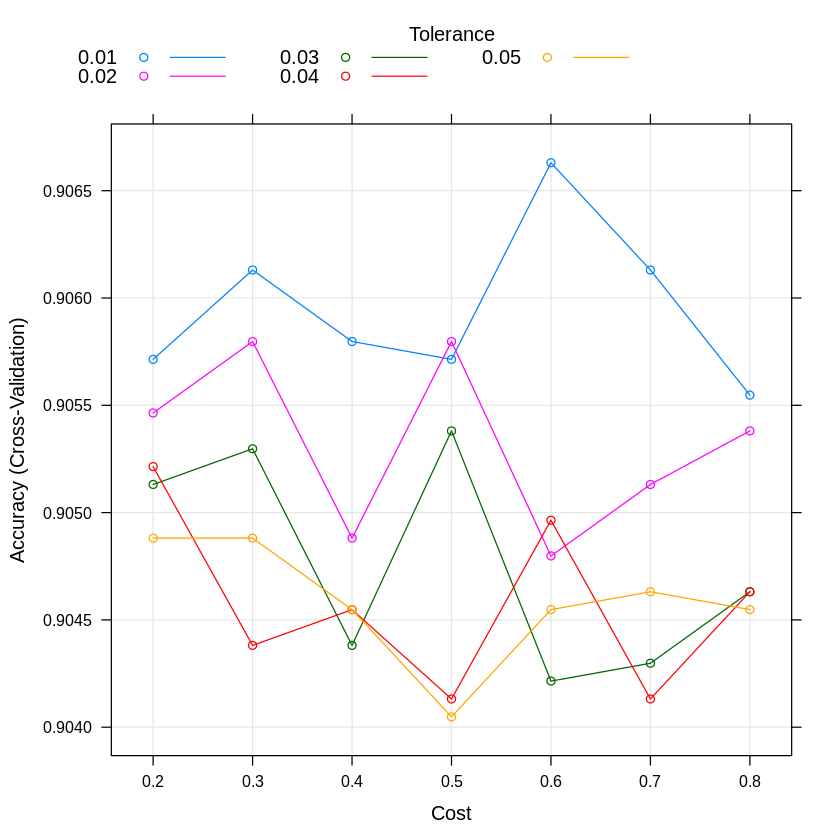

In [6]:
# fine parameters tuning

cost <- NULL
if(logistic.1$bestTune$cost==0.5){
    cost <- seq(from=0.2, to=0.8, by=0.1) 
} else if(logistic.1$bestTune$cost==1){
    cost <- seq(from=0.7, to=1.3, by=0,1) 
} else{
    cost <- seq(from=1.2, to=1.8, by=0.1)
}

epsilon <- NULL
if(logistic.1$bestTune$epsilon==0.01){
    epsilon <- seq(from=0.01, to=0.05, by=0.01)
} else{
    epsilon <- seq(from=0.1, to=0.5, by=0.1)
}

tune_grid.2 <- expand.grid(
    cost = cost, 
    loss = logistic.1$bestTune$loss,
    epsilon = epsilon
)

logistic.2 <- caret::train(
  x = train,
  y = as.factor(train.label),
  trControl = tune_control,
  tuneGrid = tune_grid.2,
  method = "regLogistic",
  verbose = FALSE
)

logistic.2$bestTune
logistic.2$results
plot(logistic.2)
pdf("Figure/Logistic/tune.pdf")
plot(logistic.2)
dev.off()

In [7]:
# performance on test set
test.label   <- as.factor(test.label)
test.predict <- predict(logistic.2, newdata=test)
error <- mean(test.predict != test.label)
accuracy <- 1-error

cat("Accuracy/Error on test set: ", accuracy, " / ", error)

Accuracy/Error on test set:  0.9053964  /  0.0946036

In [8]:
# final model trained on the entire MC
logistic_final <- LiblineaR(data=MC, target=MC.label, 
                            type=ifelse(logistic.2$bestTune$loss == "L1", 6, ifelse(logistic.2$bestTune$loss == "L2_primal", 0, 7)),
                            cost=logistic.2$bestTune$cost,
                            epsilon=logistic.2$bestTune$epsilon
                           )


In [9]:
# predictions on real data

data_lhcb.predict    <- predict(logistic_final, data_lhcb, proba=T)$predictions
data_lhcb.background <- data_lhcb[data_lhcb.predict == 0,]
data_lhcb.signal     <- data_lhcb[data_lhcb.predict == 1,]

str(data_lhcb.signal); cat("\n\n"); str(data_lhcb.background)

'data.frame':	9715 obs. of  12 variables:
 $ Lambda_c_MM_F         : num  2291 2291 2292 2292 2283 ...
 $ lc_p_ProbNNp_F        : num  1 1 0.98 0.98 0.998 ...
 $ lcZDecLSigma_F        : num  4.43 4.53 8.78 8.46 29.85 ...
 $ lcstarZDecLSigma_F    : num  -0.772 0.258 1.246 1.237 -1.159 ...
 $ lcDecTime_F           : num  0.218 0.214 0.905 0.878 1.37 ...
 $ lcstarDecTime_F       : num  -0.062 0.0583 0.2179 0.1802 -0.1967 ...
 $ lbDecTime_F           : num  1.24 1.25 1.33 1.36 3 ...
 $ lcDecVerChi2_F        : num  0.283 0.283 0.207 0.207 0.537 ...
 $ lcstarDecVerChi2_F    : num  0.475 0.622 0.828 0.91 0.391 ...
 $ Lambda_b0_DIRA_OWNPV_F: num  1 1 1 1 1 ...
 $ pair0_3pi_F           : num  1583 1583 1815 1815 306 ...
 $ pair1_3pi_F           : num  980 373 625 960 511 ...


'data.frame':	463035 obs. of  12 variables:
 $ Lambda_c_MM_F         : num  2308 2308 2308 2308 2287 ...
 $ lc_p_ProbNNp_F        : num  0.999 0.999 0.999 0.999 0.991 ...
 $ lcZDecLSigma_F        : num  3.74 3.69 3.76 3.7

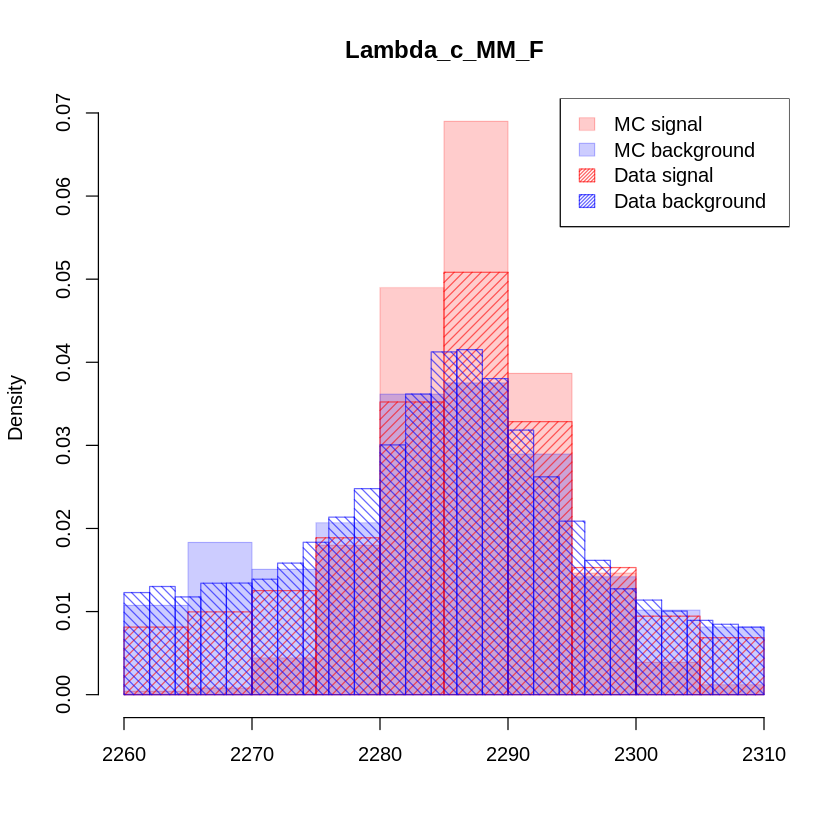

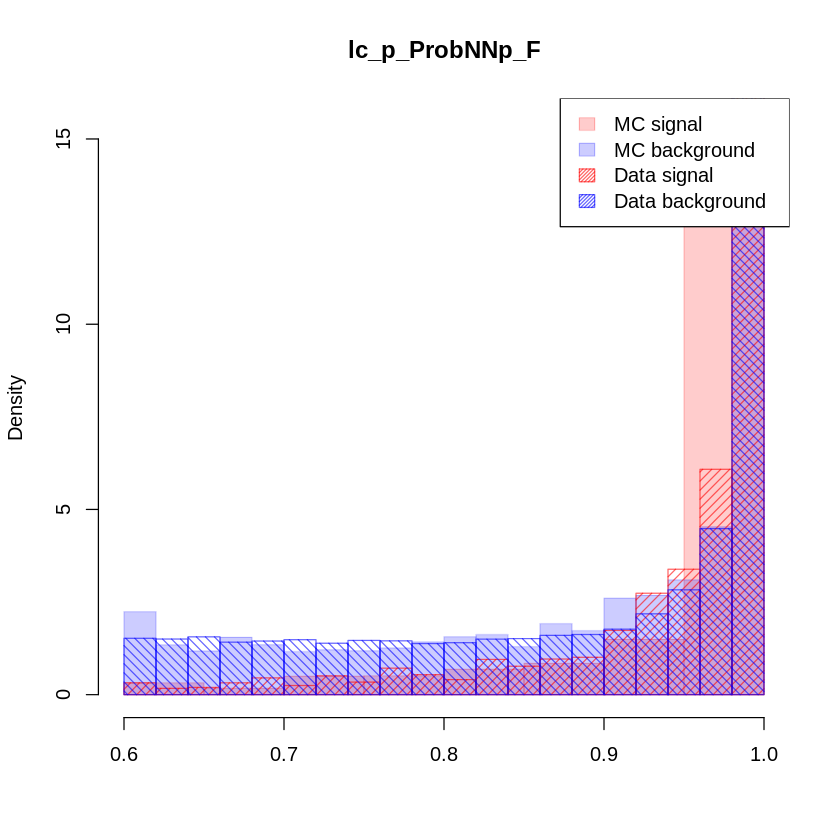

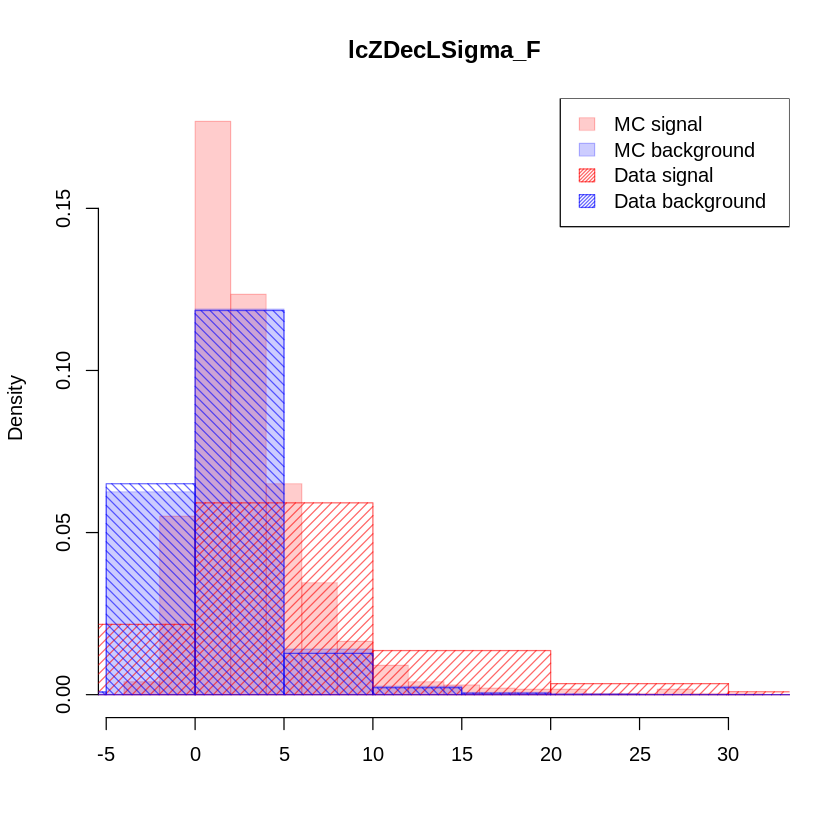

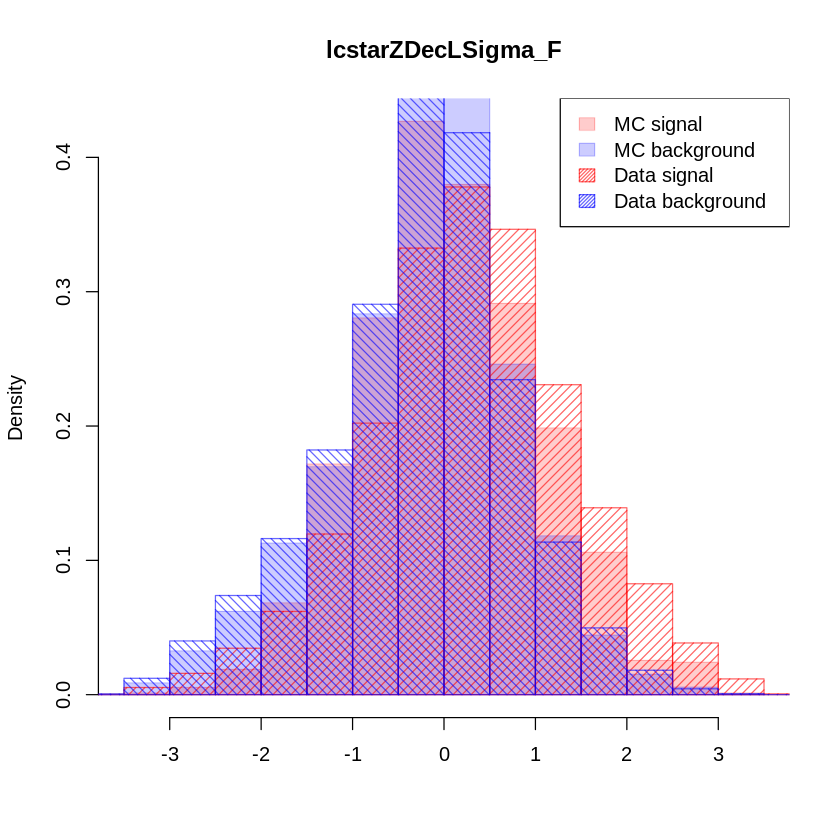

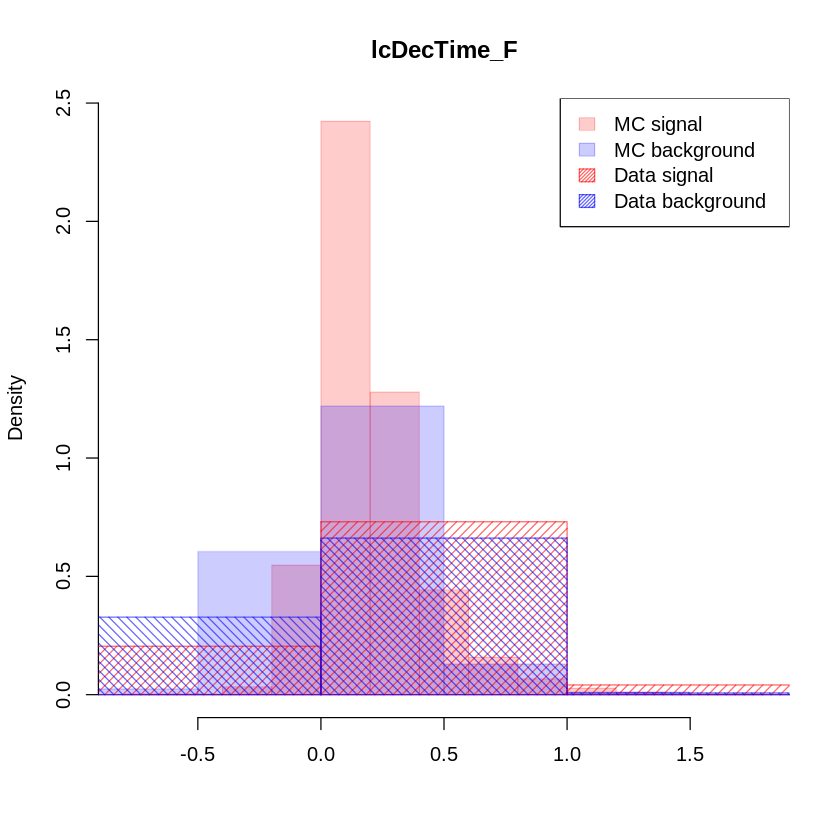

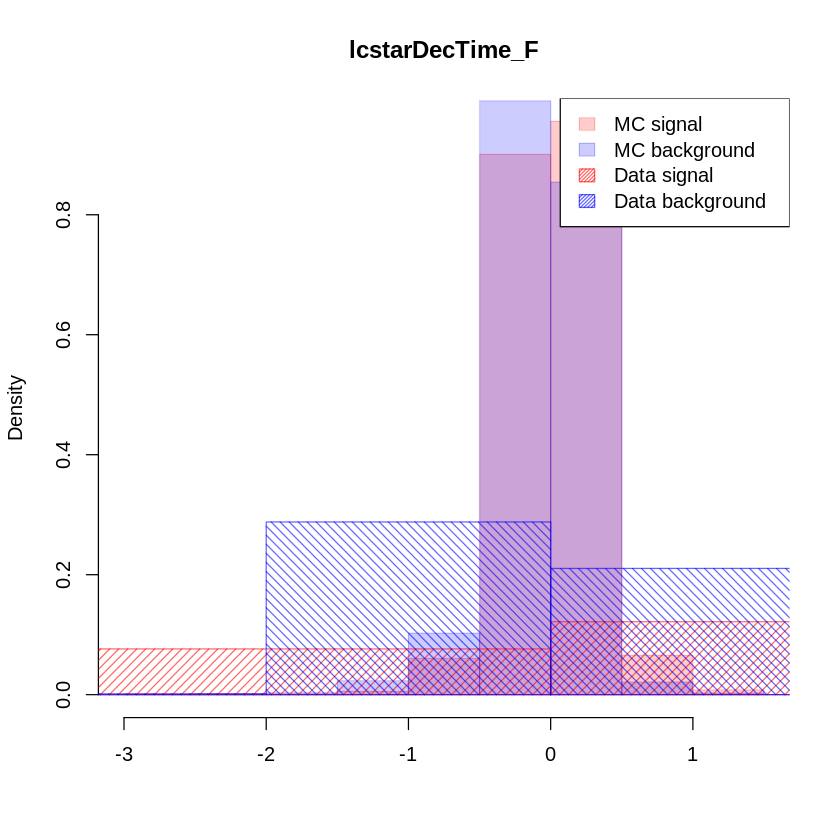

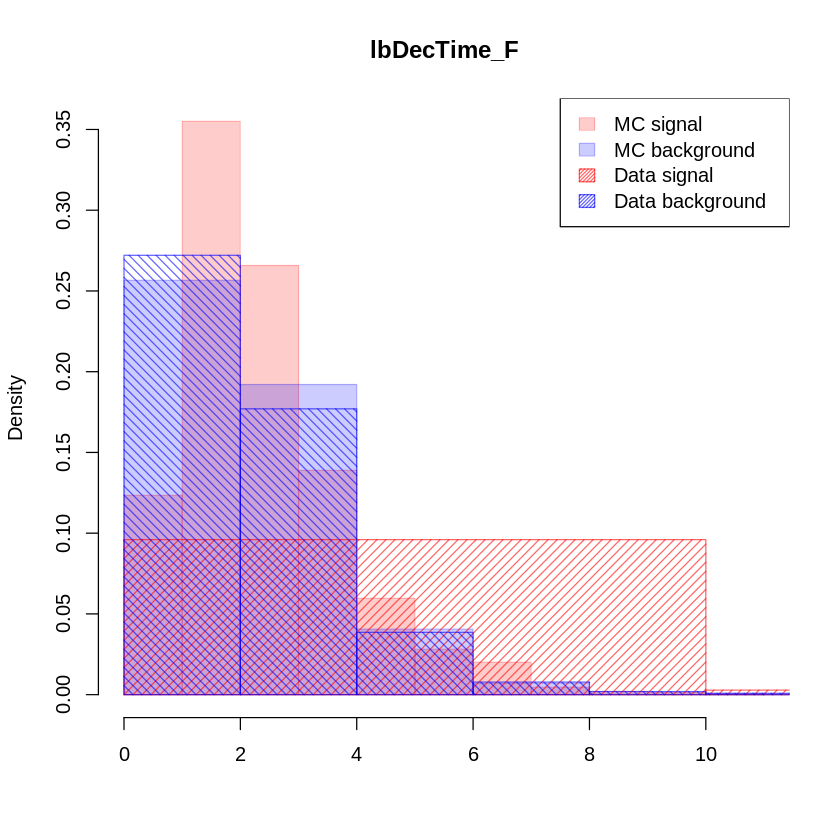

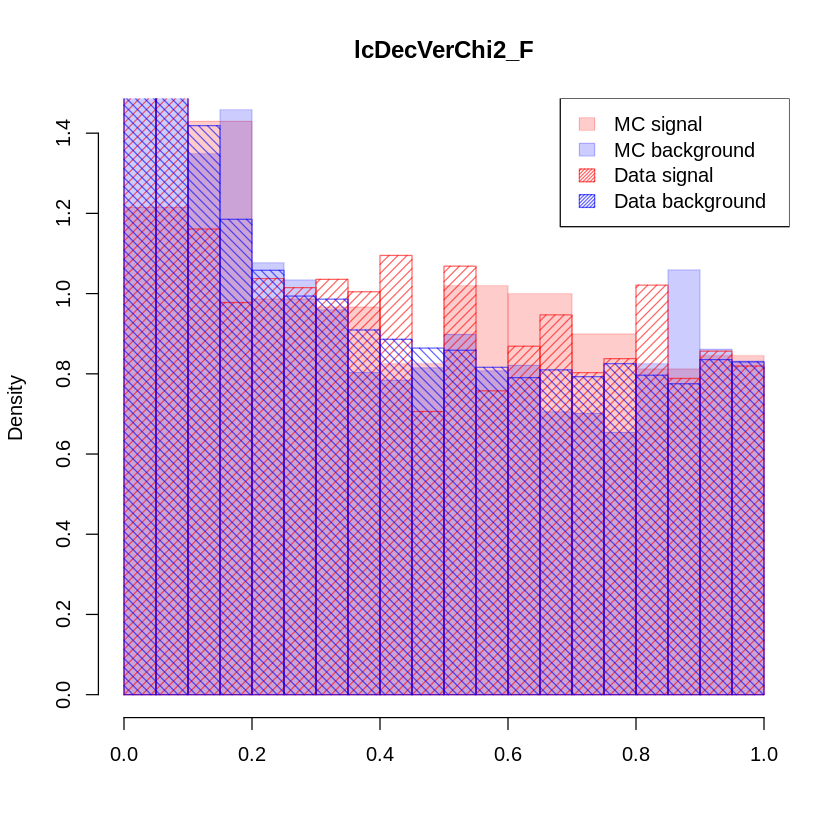

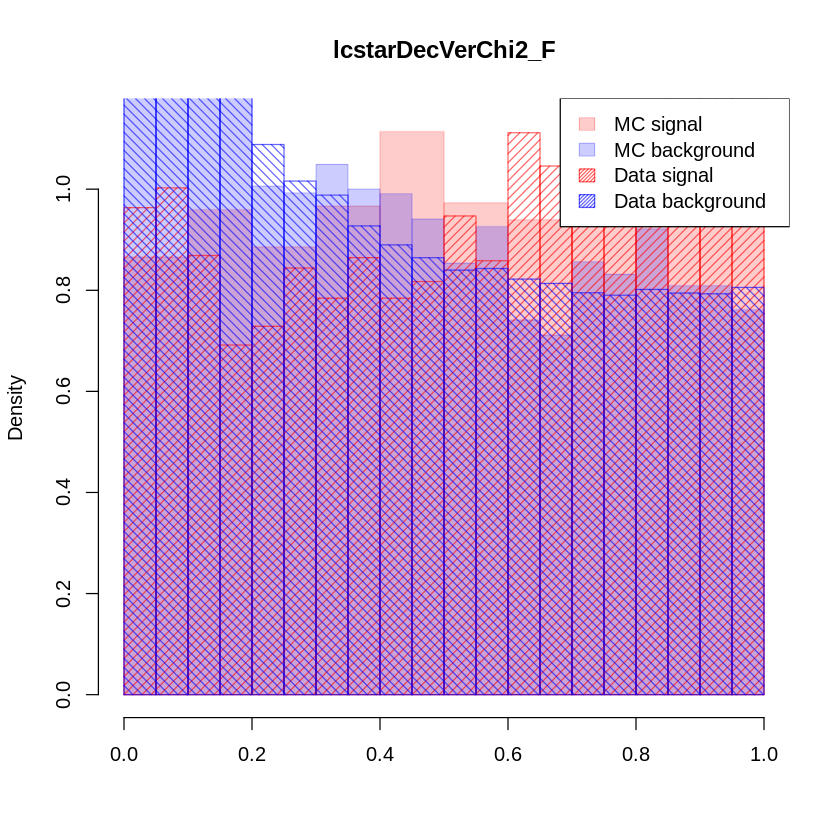

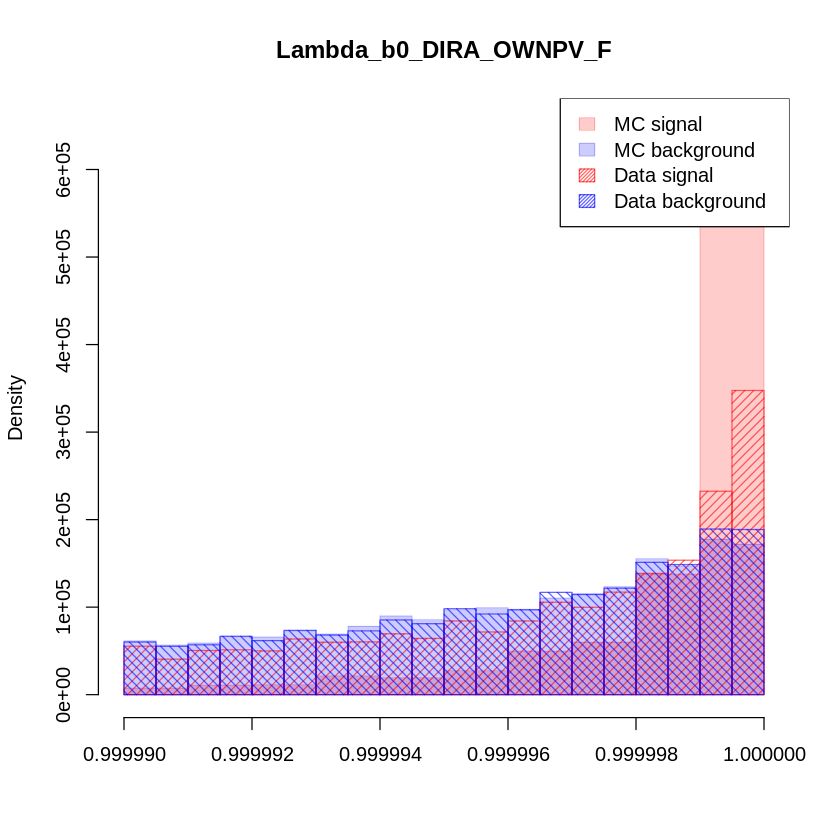

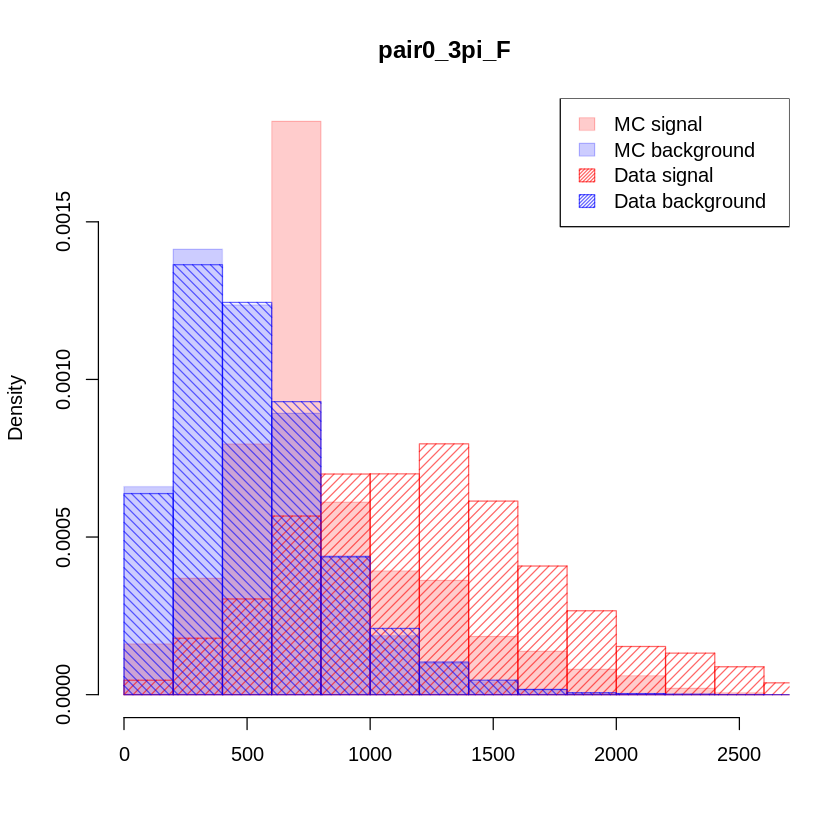

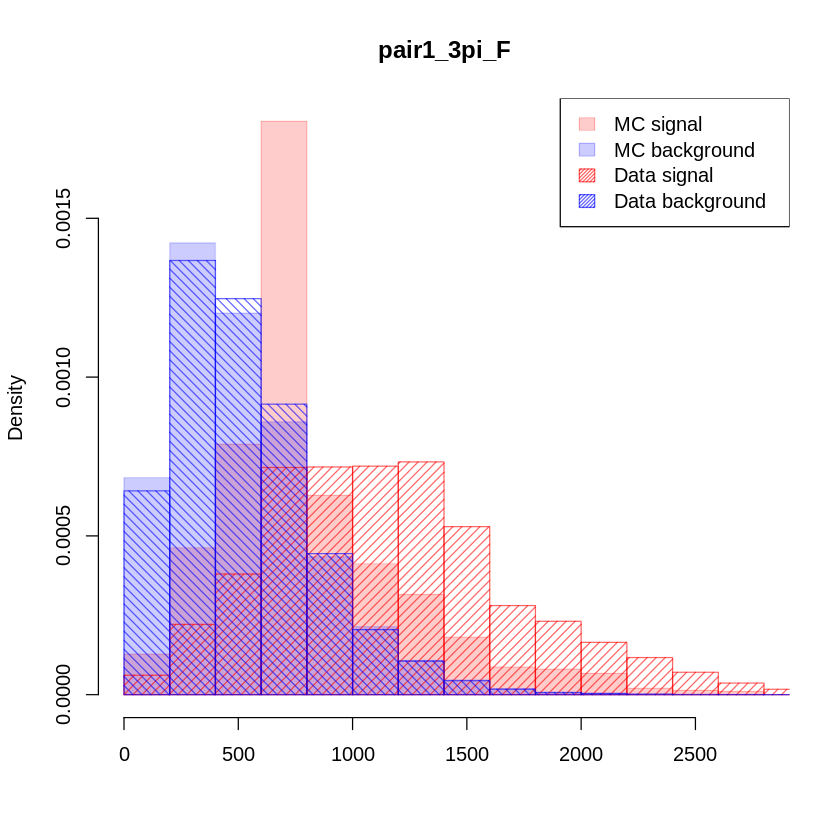

In [10]:
# plot histograms of MC and data distribution, both for signal and background

legend = c("MC signal", "MC background", "Data signal", "Data background")
col  = c(rgb(1,0,0,0.2), rgb(0,0,1,0.2), rgb(1,0,0,0.6), rgb(0,0,1,0.6))

for(f in features){
    hist(signal[[f]],     freq=F, col=col[1], border=col[1], main=f, xlab="")
    hist(background[[f]], freq=F, col=col[2], border=col[2], add=T)
    hist(data_lhcb.signal[[f]], freq=F, col=col[3], border=col[3], density=20, add=T)
    hist(data_lhcb.background[[f]], freq=F, col=col[4], border=col[4], density=20, angle=-45, add=T)
    
    legend(x="topright", legend=legend, col=col, fill=col, border=col, density=c(NA,NA, 50,50))
    
}

In [11]:
# save some significative plots
features.selected <- c("Lambda_c_MM_F", "lc_p_ProbNNp_F", "Lambda_b0_DIRA_OWNPV_F", "pair0_3pi_F", "pair1_3pi_F")
legend <- c("MC signal", "MC background", "Data signal", "Data background")
col    <- c(rgb(1,0,0,0.2), rgb(0,0,1,0.2), rgb(1,0,0,0.6), rgb(0,0,1,0.6))

for(f in features.selected){
    pdf(paste0("Figure/Logistic/", f, ".pdf"))
    hist(signal[[f]],     freq=F, breaks=15, col=col[1], border=col[1], main=f, xlab="")
    hist(background[[f]], freq=F, breaks=15, col=col[2], border=col[2], add=T)
    hist(data_lhcb.signal[[f]], freq=F, breaks=15, col=col[3], border=col[3], density=20, add=T)
    hist(data_lhcb.background[[f]], freq=F, breaks=15, col=col[4], border=col[4], density=20, angle=-45, add=T)
    
    legend.position <- ifelse(f=="Lambda_b0_DIRA_OWNPV_F" | f=="lc_p_ProbNNp_F", "top", "topright")
    legend(x=legend.position, legend=legend, col=col, fill=col, border=col, density=c(NA,NA, 50,50))
    dev.off()
    
}